# Дипломная работа "Применение методов коллаборативной фильтрации для рекомендации банковских услуг"

#### Романцова Вера группа DS-17

Датасет можно скачать по ссылке: https://www.kaggle.com/c/santander-product-recommendation/data?select=train_ver2.csv.zip

#### Внимание! В работе используется только датасет train_ver2.csv (он и разбивался на тестовую и обучающую выборки, так как в test_ver2.csv данных о покупках нет, так как это соревновательный датасет)

Перечень фич:

* fecha_dato - The table is partitioned for this column Дата
* ncodpers - Customer code Код покупателя
* ind_empleado - Employee index Индекс работника: A active - активный, B ex employed - бывший трудоустроенный, F filial - филиал, N not employee - безработный, P pasive пассивный
* pais_residencia - Customer's Country residence Страна проживания клиента
* sexo - Customer's sex Пол покупателя
* age - Age Возраст
* fecha_alta - The date in which the customer became as the first holder of a contract in the bank Дата, когда клиент стал первым держателем договора в банке
* ind_nuevo - New customer Index. 1 if the customer registered in the last 6 months. Индекс новых клиентов. 1, если клиент регистрировался в течение последних 6 месяцев.
* antiguedad - Customer seniority (in months) Стаж работы клиента (в месяцах)
* indrel - 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) 99-Основной покупатель в течение месяца, но не в конце месяца
* ult_fec_cli_1t - Last date as primary customer (if he isn't at the end of the month) Последний день в качестве основного клиента (если он не в конце месяца)
* indrel_1mes - Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner) Тип клиента в начале месяца
* tiprel_1mes - Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) Тип отношения к клиенту в начале месяца
* indresi - Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) Индекс проживания (S (Да) или N (Нет), если страна проживания совпадает со страной банка)
* indext - Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) Индекс иностранца (S (Да) или N (Нет), если страна рождения клиента отличается от страны банка)
* conyuemp - Spouse index. 1 if the customer is spouse of an employee Индекс супруга. 1, если клиент является супругой сотрудника
* canal_entrada - channel used by the customer to join канал, используемый клиентом для присоединения
* indfall - Deceased index. N/S Индекс умершего
* tipodom - Addres type. 1, primary address основной адрес
* cod_prov - Province code (customer's address) Код провинции
* nomprov - Province name Название провинции
* ind_actividad_cliente - Activity index (1, active customer; 0, inactive customer) Индекс активности
* renta - Gross income of the household Валовой доход домохозяйства
* segmento - segmentation: 01 - VIP, 02 - Individuals 03 - college graduated сегментация
* ind_ahor_fin_ult1 - Saving Account              Сберегательный счет
* ind_aval_fin_ult1 - Guarantees                  Гарантии
* ind_cco_fin_ult1 - Current Accounts            Текущие счета
* ind_cder_fin_ult1 - Derivada Account            Производный счет
* ind_cno_fin_ult1 - Payroll Account             Платежный счет
* ind_ctju_fin_ult1 - Junior Account              Младший счет
* ind_ctma_fin_ult1 - Más particular Account      Более конкретный счет
* ind_ctop_fin_ult1 - particular Account          специфический счет
* ind_ctpp_fin_ult1 - particular Plus Account     специфический+ счет
* ind_deco_fin_ult1 - Short-term deposits         Краткосрочные вклады
* ind_deme_fin_ult1 - Medium-term deposits        Среднесрочные вклады
* ind_dela_fin_ult1 - Long-term deposits          Долгосрочные вклады
* ind_ecue_fin_ult1 - e-account                   электронный счет
* ind_fond_fin_ult1 - Funds                       Фонды
* ind_hip_fin_ult1 - Mortgage                    Ипотека 
* ind_plan_fin_ult1 - Pensions                    Пенсии
* ind_pres_fin_ult1 - Loans                       Займы
* ind_reca_fin_ult1 - Taxes                       Налоги
* ind_tjcr_fin_ult1 - Credit Card                 Кредитная карта
* ind_valo_fin_ult1 - Securities                  Ценные бумаги
* ind_viv_fin_ult1 - Home Account                Домашняя учетная запись
* ind_nomina_ult1 - Payroll                     Платежная ведомость
* ind_nom_pens_ult1 - Pensions                    Пенсии
* ind_recibo_ult1 - Direct Debit                Прямой дебет

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from tqdm.auto import tqdm

from surprise import KNNWithMeans, KNNBasic, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import Dataset 
from surprise import accuracy 
from surprise import Reader
from surprise.model_selection import train_test_split
from collections import defaultdict

%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
data = pd.read_csv('train_ver2.csv.zip',
                   delimiter=',')

C:\Users\Vera_Romantsova\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Общие данные по датасету
print(f'Объем датасета: {data.shape[0]}')
users = sorted(list(data.ncodpers.unique()))
print(f'Количество уникальных пользователей: {len(users)}')
print(f'Количество уникальных продуктов: {len(data.columns[24:])}')

Объем датасета: 13647309
Количество уникальных пользователей: 956645
Количество уникальных продуктов: 24


In [4]:
# Так как датафрейм оч. большой и мощностей не хватает - предскажем значения для 2% пользователей
n = int(len(users) * 0.02)
users_for_pred = users[:n]
len(users_for_pred)

19132

In [5]:
# Будем предсказывать покупки для 19132 пользователей
df = (data[data.ncodpers.isin(users_for_pred)])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292223 entries, 410457 to 13036039
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             292223 non-null  object 
 1   ncodpers               292223 non-null  int64  
 2   ind_empleado           291459 non-null  object 
 3   pais_residencia        291459 non-null  object 
 4   sexo                   291459 non-null  object 
 5   age                    292223 non-null  object 
 6   fecha_alta             291459 non-null  object 
 7   ind_nuevo              291459 non-null  float64
 8   antiguedad             292223 non-null  object 
 9   indrel                 291459 non-null  float64
 10  ult_fec_cli_1t         253 non-null     object 
 11  indrel_1mes            291458 non-null  object 
 12  tiprel_1mes            291458 non-null  object 
 13  indresi                291459 non-null  object 
 14  indext                 291459

### Part 1 EDA 
#### Выбор фич

In [7]:
# Уберем столбцы, фактические не нужные нам, так как дублируется информация с другими nomprov и ult_fec_cli_1t
col_for_use = ['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
               'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
               'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
               'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
               'ind_actividad_cliente','renta', 'segmento', 'ind_ahor_fin_ult1',
               'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
               'ind_cno_fin_ult1','ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
               'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
               'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
               'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
               'ind_pres_fin_ult1', 'ind_reca_fin_ult1','ind_tjcr_fin_ult1',
               'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
               'ind_nom_pens_ult1', 'ind_recibo_ult1']
df = df.filter(col_for_use)

In [8]:
# Изменим тип данных для следующих столбцов
df.age = pd.to_numeric(df.age, errors='coerce')
df.renta = pd.to_numeric(df.renta, errors='coerce')
df.antiguedad = pd.to_numeric(df.antiguedad, errors='coerce')

In [9]:
# Посмотрим на значения метрик для количественных переменных (кроме продуктов, т.к. там булев формат)
num_cols = [col for col in df.columns[:22] if df[col].dtype in ['int64', 'float64']]
df[num_cols].describe()

,ncodpers,age,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,292223.000000,291459.000000,291459.000000,291459.000000,291459.000000,291458.0,290067.000000,291459.000000,2.526480e+05
mean,35394.678715,58.986269,0.002381,214.903932,1.085069,1.0,26.188794,0.571607,1.932225e+05
std,11569.656028,12.393999,0.048739,43.788302,2.886089,0.0,10.358267,0.494847,3.286612e+05
min,15889.000000,25.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.355226e+04
25%,25138.000000,50.000000,0.000000,219.000000,1.000000,1.0,28.000000,0.000000,9.511857e+04
50%,35373.000000,55.000000,0.000000,231.000000,1.000000,1.0,28.000000,1.000000,1.491593e+05
75%,45716.000000,65.000000,0.000000,238.000000,1.000000,1.0,28.000000,1.000000,2.275390e+05
max,55112.000000,116.000000,1.000000,256.000000,99.000000,1.0,52.000000,1.000000,2.203474e+07


In [10]:
def get_pairplot(df, columns=None):
    if columns is None:
        columns = list(df.columns)
    sns.pairplot(df[columns])
    pass

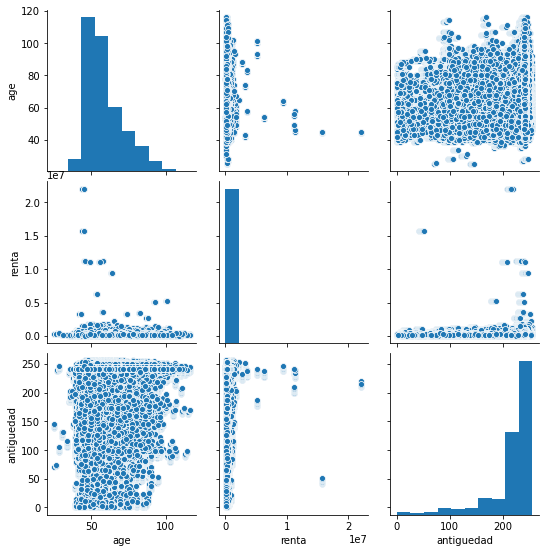

In [11]:
# Посмотрим на зависимость количественных переменных друг от друга
get_pairplot(df[['age', 'renta', 'antiguedad']])

In [12]:
# Четкой зависимости переменных друг от друга не видим - поэтому можем оставлять все эти фичи в датасете

In [13]:
# Посмотрим на значения метрик для качественных переменных (кроме продуктов, т.к. там булев формат)
cat_cols = [col for col in df.columns[:22] if df[col].dtype in ['O']]
df[cat_cols].describe().transpose()

,count,unique,top,freq
fecha_dato,292223,17,2015-07-28,18850
ind_empleado,291459,4,N,287690
pais_residencia,291459,29,ES,290068
sexo,291459,2,V,202283
fecha_alta,291459,2623,1995-10-30,2795
indrel_1mes,291458,13,1,217643
tiprel_1mes,291458,4,A,187034
indresi,291459,2,S,290067
indext,291459,2,N,286106
conyuemp,1722,2,N,1705


### Part 1 EDA 
#### Проверка на выбросы

In [14]:
# Посмотрим на выбросы для количественных переменных
def get_boxplot(df, columns=[]):
    for i in columns:
        sns.boxplot(x=df[i])
    pass

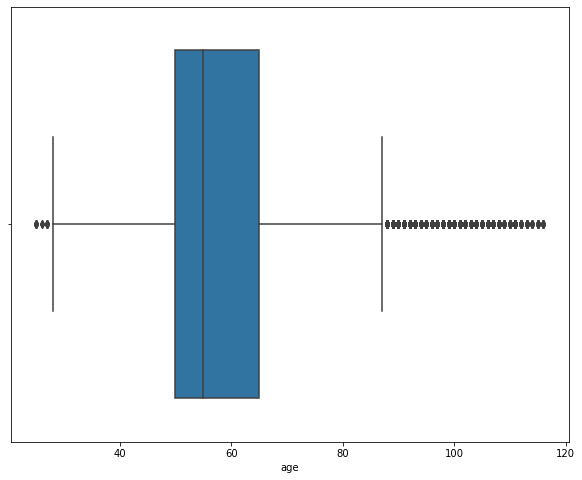

In [15]:
# Выбросы для возраста
get_boxplot(df, ['age'])

Пожилые люди в датасете есть, минимальный возраст клиента - совершеннолетний (25 лет). Пожилых людей из датасета удалять не будем, так как продукты  ind_nom_pens_ult1, ind_plan_fin_ult1 (Пенсии) - для них.

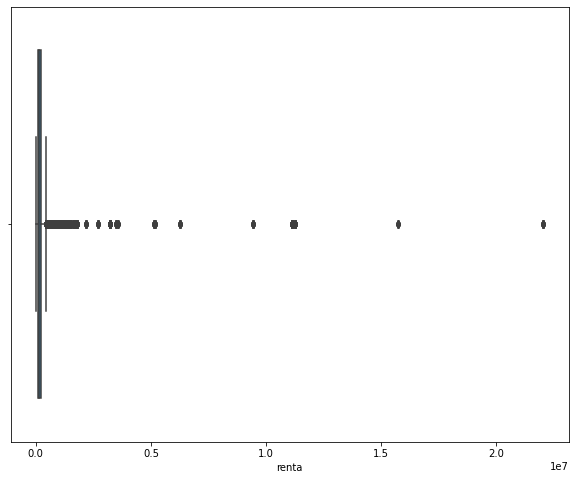

In [16]:
get_boxplot(df, ['renta'])

In [17]:
#Кол-во VIP-клиентов (это выбросы, но их не удаляем, VIP-клиенты же)
print(f'Количество VIP-клиентов: {df.loc[df["renta"] > 5000000].shape[0]}')

Количество VIP-клиентов: 158


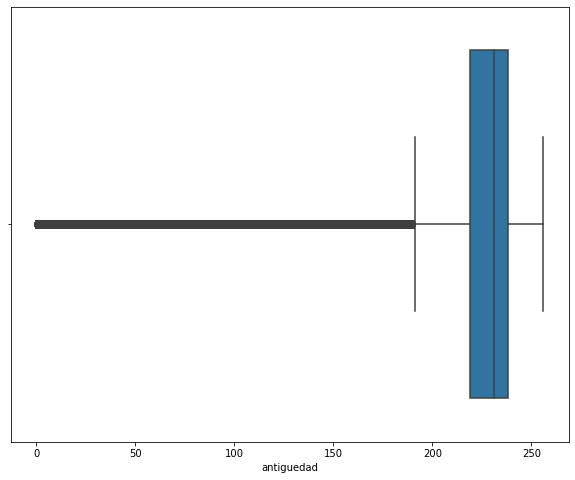

In [19]:
# Посмотрим на выбросы для стажа клиента (в месяцах)
get_boxplot(df, ['antiguedad'])

Максимум составляет 256 месяцев, это чуть более 20 лет, эти данные вполне логичны, выбрасывать ничего не нужно.

### Part 1 EDA 
#### Заполнение пропусков

In [19]:
# Посмотрим на пропуски
df.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                764
pais_residencia             764
sexo                        764
age                         764
fecha_alta                  764
ind_nuevo                   764
antiguedad                  764
indrel                      764
indrel_1mes                 765
tiprel_1mes                 765
indresi                     764
indext                      764
conyuemp                 290501
canal_entrada              3695
indfall                     764
tipodom                     765
cod_prov                   2156
ind_actividad_cliente       764
renta                     39575
segmento                   4028
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop_fin_ult1             0
ind_ctpp_fin_ult1             0
ind_deco

ind_empleado:


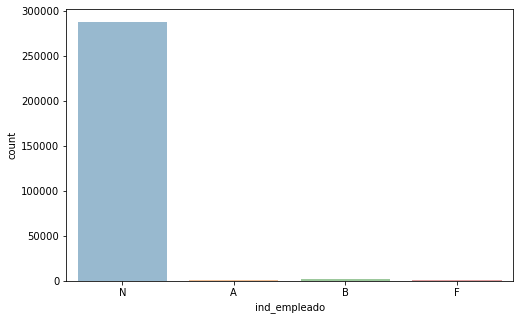

pais_residencia:


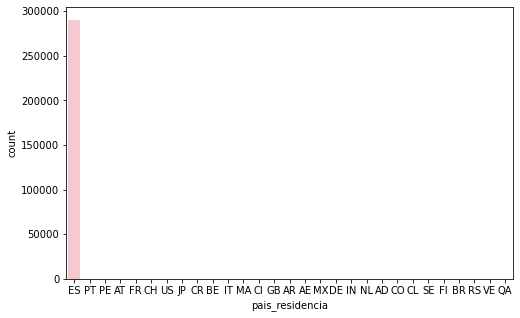

sexo:


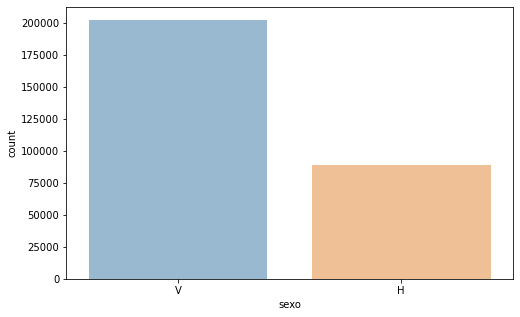

ind_nuevo:


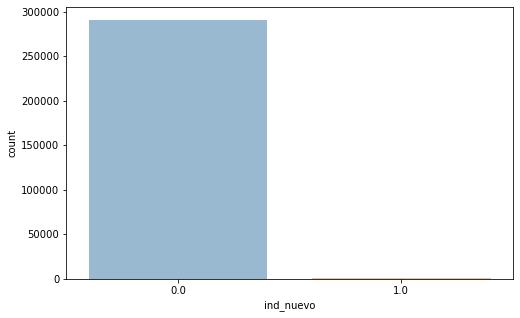

indrel:


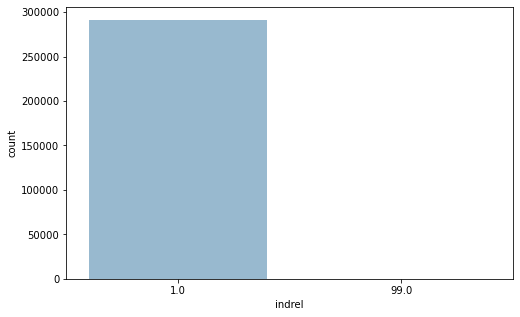

indrel_1mes:


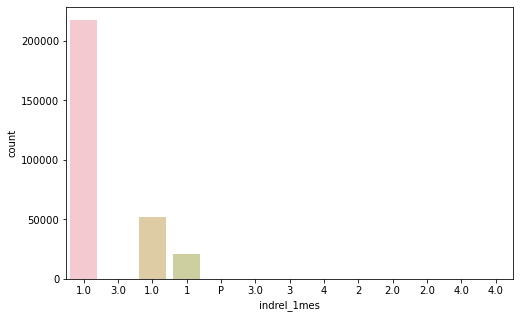

tiprel_1mes:


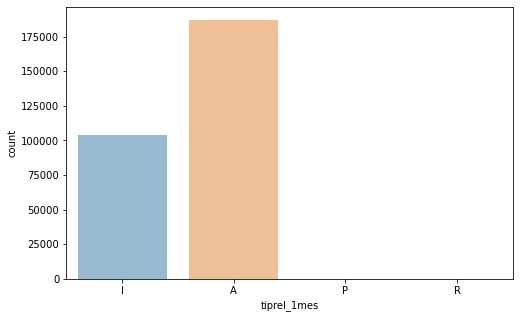

indresi:


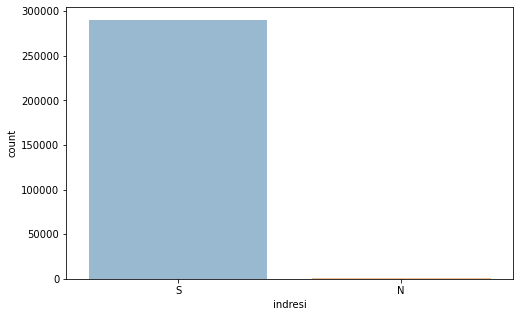

indext:


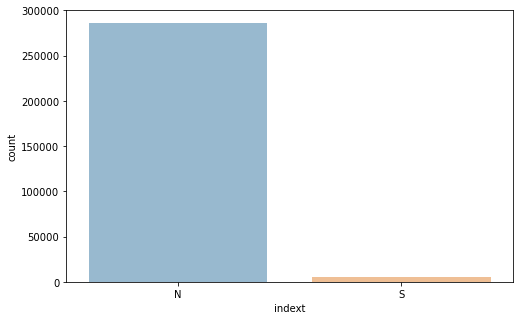

conyuemp:


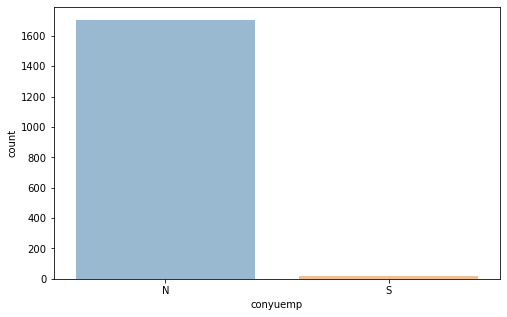

indfall:


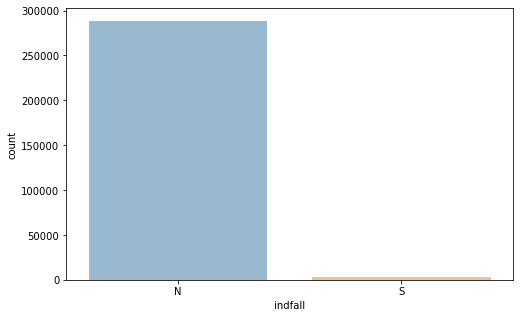

tipodom:


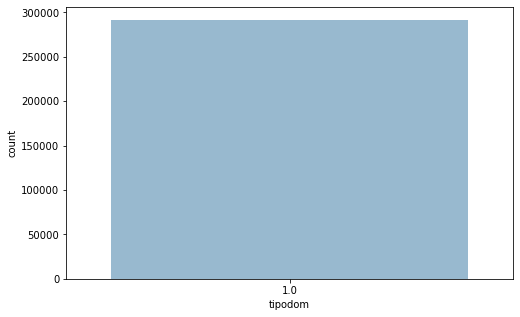

cod_prov:


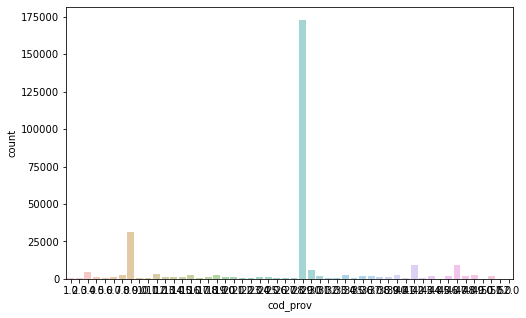

ind_actividad_cliente:


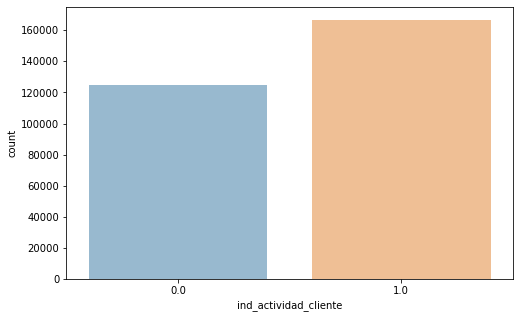

segmento:


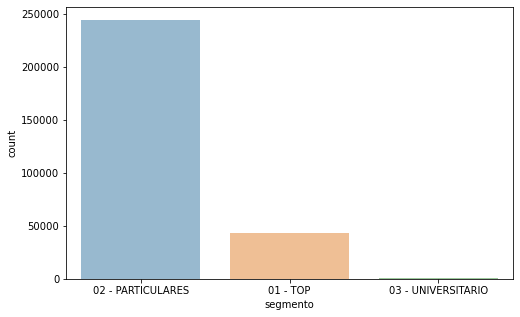

In [20]:
# Построим гистограммы распределения для категориальных признаков с пропусками
impute_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'ind_nuevo', 'indrel', 
               'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 
               'indfall', 'tipodom', 'cod_prov', 'ind_actividad_cliente',
               'segmento']
for col in impute_cols:
    print(f'{col}:')
    f, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(x=col, data=df, alpha=0.5)
    plt.show()

In [23]:
# Заменим пропуски:
df.loc[df['ind_empleado'].isnull(),'ind_empleado'] = 'N'  # заменим модой
df.loc[df['pais_residencia'].isnull(),'pais_residencia'] = 'ES'  # заменим модой
df.loc[df['sexo'].isnull(),'sexo'] = 'V'  # заменим модой 
df.fecha_alta = df.fecha_alta.astype('datetime64[ns]')  # заменим модой
df.loc[df['fecha_alta'].isnull(), 'fecha_alta'] = pd.Timestamp(1995,10,30)
df.loc[df['ind_nuevo'].isnull(), 'ind_nuevo'] = 0  # заменим модой
df.loc[df['indrel'].isnull(), 'indrel'] = 1  # заменим модой
df.indrel_1mes = df.indrel_1mes.astype('str').str.slice(0,1)
df.loc[df['indrel_1mes'].isnull(), 'indrel_1mes'] = '1'  # заменим модой
df.loc[df['tiprel_1mes'].isnull(), 'tiprel_1mes'] = 'A'  # заменим модой
df.loc[df['indresi'].isnull(), 'indresi'] = 'S'  # заменим модой
df.loc[df['indext'].isnull(), 'indext'] = 'N'  # заменим модой
df.loc[df['canal_entrada'].isnull(), 'canal_entrada'] = 'KHQ'  # заменим модой
df.loc[df['indfall'].isnull(), 'indfall'] = 'N'  # заменим модой
df.loc[df['tipodom'].isnull(), 'tipodom'] = 1.0  # заменим модой
df.loc[df['cod_prov'].isnull(), 'cod_prov'] = 28.0  # заменим модой
df.loc[df['ind_actividad_cliente'].isnull(), 'ind_actividad_cliente'] = 1.0  # заменим модой
df['renta'] = df[['renta','cod_prov']].groupby('cod_prov').transform(lambda x: x.fillna(x.mean())) # заменим средним значением по провинции
df['age'] = df[['age','cod_prov']].groupby('cod_prov').transform(lambda x: x.fillna(x.mean()))  # заменим средним значением по провинции
df['antiguedad'] = df[['antiguedad','cod_prov']].groupby('cod_prov').transform(lambda x: x.fillna(x.mean())) # заменим средним значением по провинции
df.loc[df['segmento'].isnull(), 'segmento'] = '02 - PARTICULARES'  # заменим модой
df.loc[df['conyuemp'].isnull(), 'conyuemp'] = 'N'  # заменим модой по всему датасету
df.loc[df['ind_nomina_ult1'].isnull(), 'ind_nomina_ult1'] = 0  # 0 - для продуктов пропуски лучше заменить 0, так как видимо на этот момент их не было и купить было нельзя
df.loc[df['ind_nom_pens_ult1'].isnull(), 'ind_nom_pens_ult1'] = 0  # 0 - для продуктов пропуски лучше заменить 0, так как видимо на этот момент их не было и купить было нельзя

In [24]:
# Проверим, все ли пропуски заполнилисъ
def null_feature(data):
    null_feature = data.isnull().sum()
    return null_feature[null_feature > 0]
null_feature(df)

renta    4418
dtype: int64

In [25]:
# Посмотрим, в каких провинциях нет данных по ренте
null_prov = df.groupby('cod_prov').mean()[['renta']].renta.isnull()
null_prov_id = null_prov[null_prov == True].index.tolist()
print(f'Нет данных по ренте в провинциях: {null_prov_id}')

Нет данных по ренте в провинциях: [1.0, 20.0, 48.0]


In [26]:
# Заполним пропуски для cod_prov = null_prov_id значением ренты провинции по всему датасету
renta_prov = data.groupby('cod_prov').mean()[['renta']]
for i in null_prov_id:
    df.loc[(df['cod_prov'] == i) & (df['renta'].isnull()), 'renta'] = renta_prov.renta[int(i)]

In [27]:
# Снова проверим, все ли пропуски заполнилисъ
null_feature(df)

Series([], dtype: int64)

In [28]:
# Преобразуем для продуктов тип данных (т.к. в остальных везде int)
df = df.fillna(0)
df.ind_nomina_ult1 = df.ind_nom_pens_ult1.astype('int')
df.ind_nom_pens_ult1 = df.ind_nom_pens_ult1.astype('int')

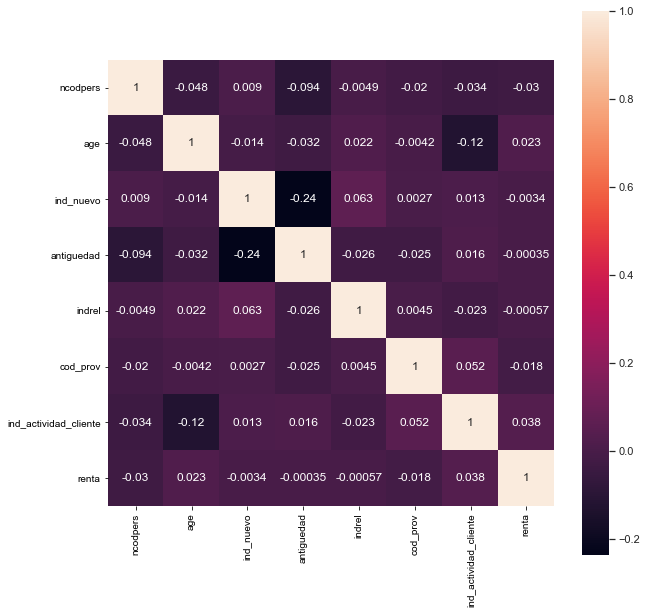

In [29]:
#Проверим признаки на скоррелированность
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(df[['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
               'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
               'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
               'conyuemp', 'canal_entrada', 'indfall', 'cod_prov',
               'ind_actividad_cliente','renta', 'segmento']].corr(), 
            annot=True,
            cbar = True,
            square=True,
           ax =ax)

### Part 2 Train/test split

In [30]:
# Сделаем разбивку на тест и трейн по месяцам 
# (нелогично предсказывать то, что было куплено раньше по тому, что куплено позже)
SPLIT_DATE = '2015-12-28' # Всё, что после этой даты, идёт в тест. Остальное - в трейн
train_mask = df.fecha_dato <= SPLIT_DATE
data_train = df.loc[train_mask]
data_test = df.loc[~train_mask]

Text(0.5, 1.0, 'Распределение данных по train/test')

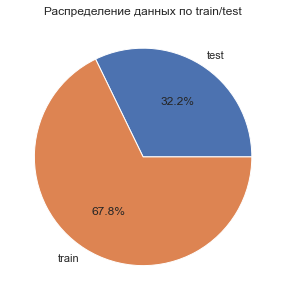

In [31]:
# Посмотрим на соотношение долей обучающей и тестовой выборок

df_dates = pd.DataFrame(df.fecha_dato.value_counts().reset_index())
df_dates.columns = ['fecha_dato', 'count']
df_dates['fold'] = 'test'
df_dates.loc[df_dates.fecha_dato <= SPLIT_DATE, 'fold'] = 'train'

plt.figure(figsize=(5,5))
df_fold_pct = df_dates[['count',
                        'fold']].groupby(['fold']).agg(['sum']).unstack().reset_index().rename_axis(None, axis=1)
df_fold_pct.drop(['level_0', 'level_1'], axis=1, inplace=True)
df_fold_pct.columns = ['fold', 'count_']
plt.pie(df_fold_pct.count_, labels=df_fold_pct.fold, autopct='%1.1f%%')
plt.title('Распределение данных по train/test')

### Part 2 Подготовка данных: Функция для генерации датасетов surprise

Данные преобразуются в следующий вид: {пользователь, товар, рейтинг (0-не купил, 1-купил)}

Все покупки до 2015-12-28 идут в трейн, все остальные - в тест

In [32]:
product_cols = [col for col in df.columns[22:]] # столбцы с продуктами для получения предикта по юзеру
def generate_train_test(df_train, df_test):
    # Функция для генерации датасетов surprise

    rows = []
    for _, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):
        uid = row['ncodpers']
        for product in product_cols:
            rows.append({'uid': uid, 'iid': product, 'rating': min(1, row[product])})
    train_indices = np.arange(len(rows))
    
    for _, row in tqdm(df_test.iterrows(), total=df_test.shape[0]):
        uid = row['ncodpers']
        for product in product_cols:
            rows.append({'uid': uid, 'iid': product, 'rating': min(1, row[product])})
    test_indices = np.arange(len(train_indices), len(rows))
        
    df_CF = pd.DataFrame(rows)
    min_ = df_CF.rating.min()
    max_ = df_CF.rating.max()
    reader = Reader(rating_scale=(min_,max_ )) #задаем границы рейтинга
    data = Dataset.load_from_df(df_CF, reader) # for all data
    raw_trainset = [data.raw_ratings[i] for i in train_indices]
    raw_testset = [data.raw_ratings[i] for i in test_indices]

    trainset = data.construct_trainset(raw_trainset)
    testset = data.construct_testset(raw_testset)
    return data, trainset, testset

In [33]:
dset, trainset, testset = generate_train_test(data_train, data_test)

In [22]:
# del df, data_train, data_test; import gc; gc.collect() # очистим память

### Part 3 BaselineModel:  Item-based Collaborative Filtering

In [34]:
# Обучим модель на рэндомных параметрах
knn_model = KNNWithMeans(k=5, sim_options={'name':'cosine', 'user_based':False})
knn_model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


C:\Users\Vera_Romantsova\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


In [35]:
# Предскажем значения для тестовой выборки
test_pred_knn = knn_model.test(testset)
print('Collaborative Filtering: Test Set')
accuracy.rmse(test_pred_knn)

Collaborative Filtering: Test Set
RMSE: 0.1142


0.11422895355731633

#### Просмотр рекомендаций для отдельного пользователя (на рэндомных параметрах)

In [36]:
# Возьмем пользователя из тестовой выборки и посмотрим на рекомендации ему 
test_user = testset[4]
print(f'Пользователь для рекомендации: {test_user[0]}')
print(f'Пользователь для рекомендации выбрал : {test_user[1]}')

Пользователь для рекомендации: 53488
Пользователь для рекомендации выбрал : ind_cno_fin_ult1


In [37]:
# Функция для получения переченя продуктов с оценками для пользователя (из тестовой выборки)
def rec_for_user(user, model):
    res = []
    for product in product_cols:
        pred = model.predict(uid=user, iid=product)
        res.append({'product': pred[1], 'score': pred[3]})
    result = pd.DataFrame(res).set_index('product')
    result.score /= result.score.sum()
    return result['score']
rec_for_user(test_user[0], knn_model)

product
ind_ahor_fin_ult1    0.000000e+00
ind_aval_fin_ult1    0.000000e+00
ind_cco_fin_ult1     0.000000e+00
ind_cder_fin_ult1    0.000000e+00
ind_cno_fin_ult1     1.052632e-01
ind_ctju_fin_ult1    0.000000e+00
ind_ctma_fin_ult1    0.000000e+00
ind_ctop_fin_ult1    0.000000e+00
ind_ctpp_fin_ult1    0.000000e+00
ind_deco_fin_ult1    0.000000e+00
ind_deme_fin_ult1    0.000000e+00
ind_dela_fin_ult1    1.826025e-18
ind_ecue_fin_ult1    1.315789e-01
ind_fond_fin_ult1    1.315789e-01
ind_hip_fin_ult1     0.000000e+00
ind_plan_fin_ult1    9.130124e-19
ind_pres_fin_ult1    0.000000e+00
ind_reca_fin_ult1    1.315789e-01
ind_tjcr_fin_ult1    1.052632e-01
ind_valo_fin_ult1    1.826025e-18
ind_viv_fin_ult1     2.282531e-19
ind_nomina_ult1      1.315789e-01
ind_nom_pens_ult1    1.315789e-01
ind_recibo_ult1      1.315789e-01
Name: score, dtype: float64

#### User-based Collaborative Filtering
не смогла запустить, так как не хватает памяти, что ожидаемо, так как уникальных пользователей у нас очень много((, в таких случаях обычно используют Item-based, что мы и делали выше)

In [ ]:
# knn_model = KNNWithMeans(k=10, sim_options={'name':'pearson', 'user_based':True})
# knn_model.fit(trainset)

In [ ]:
# test_pred_knn=knn_model.test(testset)
# print('User-based collaborative Filtering: Test Set')
# accuracy.rmse(test_pred_knn)

In [3]:
# del knn_model, test_pred_knn
# import gc; gc.collect()

### Part 3 BaselineModel:  Item-based Collaborative Filtering
####  Подбор наилучших параметров (Внимание! Считался часов 10)

In [28]:
# KNNWithMeans - подберем наилучшие параметры
param_grid = {'k': [5, 10],
              'sim_options': {'name': ['msd', 'cosine','pearson'],
                              'user_based': [False]}}
gs_knn_means = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)
gs_knn_means.fit(dset)

# лучший RMSE
print('Hаилучший RMSE:')
print(gs_knn_means.best_score['rmse'])

# комбинация параметров, которая дает лучший RMSE
print('Комбинация параметров, дающая наилучший RMSE:')
print(gs_knn_means.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...


C:\Users\Vera_Romantsova\anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing simi

In [38]:
# Обучим модель на наилучших параметрах, best_estimator здесь не используем, так как у нас своя разбивка на test/train и все модели
# мы сравниваем на ней
knn_model_best = KNNWithMeans(k=10, sim_options={'name': 'pearson', 'user_based': False})
knn_model_best.fit(trainset)
# посчитаем RMSE
test_pred_knn = knn_model_best.test(testset)
print('User-based collaborative Filtering: Test Set')
accuracy.rmse(test_pred_knn)

Computing the pearson similarity matrix...
Done computing similarity matrix.
User-based collaborative Filtering: Test Set
RMSE: 0.0981


0.09805912048031189

### Part 4 Рекомендации на основе скрытых факторов (SVD)

In [39]:
# Будем использовать SVD, на основе его считаем скрытые факторы (рэндомные параметры, так как SVD считается оч долго)
algo_HF = SVD(n_factors=20, n_epochs=20)
algo_HF.fit(trainset)
test_pred = algo_HF.test(testset)
print('Recommendations based on hidden factors: Test Set')
accuracy.rmse(test_pred)

Recommendations based on hidden factors: Test Set
RMSE: 0.2665


0.26646694406374166

#### Просмотр рекомендаций для отдельного пользователя (на рэндомных параметрах)

In [40]:
# Получим перечень продуктов с макс оценкой для пользователя (из тестовой выборки)
rec_for_user(test_user[0], algo_HF)

product
ind_ahor_fin_ult1    0.036920
ind_aval_fin_ult1    0.036929
ind_cco_fin_ult1     0.079465
ind_cder_fin_ult1    0.036790
ind_cno_fin_ult1     0.044206
ind_ctju_fin_ult1    0.036814
ind_ctma_fin_ult1    0.047411
ind_ctop_fin_ult1    0.035772
ind_ctpp_fin_ult1    0.037368
ind_deco_fin_ult1    0.039915
ind_deme_fin_ult1    0.036784
ind_dela_fin_ult1    0.054258
ind_ecue_fin_ult1    0.042787
ind_fond_fin_ult1    0.037477
ind_hip_fin_ult1     0.036749
ind_plan_fin_ult1    0.037610
ind_pres_fin_ult1    0.036834
ind_reca_fin_ult1    0.041623
ind_tjcr_fin_ult1    0.039174
ind_valo_fin_ult1    0.036677
ind_viv_fin_ult1     0.037020
ind_nomina_ult1      0.043262
ind_nom_pens_ult1    0.043282
ind_recibo_ult1      0.044872
Name: score, dtype: float64

### Part 4 Рекомендации на основе скрытых факторов (SVD)
####  Подбор наилучших параметров - считается очень долго, надо запускать на сервере

In [51]:
# KNNWithMeans - подберем наилучшие параметры
# param_grid = {'n_factors': [10, 20],
#              'n_epochs': [20]}
# gs_knn_means = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
# gs_knn_means.fit(dset)

# # лучший RMSE
# print('Hаилучший RMSE:')
# print(gs_knn_means.best_score['rmse'])

# # комбинация параметров, которая дает лучший RMSE
# print('Комбинация параметров, дающая наилучший RMSE:')
# print(gs_knn_means.best_params['rmse'])

In [52]:
# Обучим модель на наилучших параметрах, best_estimator здесь не используем, так как у нас своя разбивка на test/train и все модели
# мы сравниваем на ней
# algo_HF_best = SVD(n_factors=20, n_epochs=20)
# algo_HF_best.fit(trainset)
# # посчитаем RMSE
# test_pred = algo_HF_best.test(testset)
# print('Hidden Factors RS best params: Test Set')
# accuracy.rmse(test_pred)

### Part 5 Рекомендации на основе метрик пользователя для холодного старта

В нашем датасете нет данных о характеристиках продукта, из-за этого для новых пользователей возникает проблема "холодного старта".
Предлагаю на основе характеристик пользователя с использованием KNN найти наиболее похожих пользователей на нашего 
и порекомендовать ему те продукты, которые выбрали наиболее похожие на него.
Таким образом будем решать проблему "холодного старта", когда данных о покупках пользователя у нас еще нет.

In [41]:
user_columns = [col for col in df.columns[:22]] # столбцы с информацией по юзеру
features_to_exclude = ['fecha_dato', 'ncodpers', 'fecha_alta']
numeric_user_columns = [col for col in df[user_columns].select_dtypes(include=np.number).columns if col not in features_to_exclude] # числовые столбцы с информацией по юзеру
cat_user_columns = [col for col in user_columns if col not in numeric_user_columns and col not in features_to_exclude] # категориальные столбцы с информацией по юзеру

In [42]:
df_users = df[['ncodpers'] + numeric_user_columns + cat_user_columns].drop_duplicates()
df_users[numeric_user_columns] = df_users[numeric_user_columns] / df_users[numeric_user_columns].max() # нормируем числовые признаки

In [43]:
df_normed = df.copy()
df_normed[numeric_user_columns] = df_normed[numeric_user_columns] / df_normed[numeric_user_columns].max() # нормируем числовые признаки

In [44]:
# Напишем функуию для получения рекомендаций по сходству категориальных фич пользователей
def cold_rec_for_user(uid, n_neighbours=100):
    user = df_users[df_users['ncodpers'] == uid].iloc[0]
    neighbours_df = df_users[df_users['ncodpers'] != uid]
    cat_user_features = user[cat_user_columns] # категориальные фичи пользователя
    neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
    neighbours_df = neighbours_df[neighbours_df['cat_similarity'] == neighbours_df['cat_similarity'].max()] # оставляем только соседей с наибольшим числом совпавших категориальных фич
    neighbours_df['num_distance'] = ((neighbours_df[numeric_user_columns] - user[numeric_user_columns]) ** 2).sum(1)
    neighbours = neighbours_df.sort_values('num_distance', ascending=True).iloc[:n_neighbours]['ncodpers'].values
    neighbours_ranks = df[df.ncodpers.isin(neighbours)].groupby('ncodpers')[product_cols].apply(lambda df: df.sum() / df.sum().sum()) # рейтинги соседей для разных продуктов
    final_rec = neighbours_ranks.mean() # получаем финальную рекомендацию усреднением по рейтингам соседей
    return final_rec
    # найдём сначала пользователей, для которых совпало наибольшее количество категориальных фич

rec = cold_rec_for_user(test_user[0]).sort_values(ascending=False)
rec

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич


ind_cco_fin_ult1     0.174021
ind_fond_fin_ult1    0.150976
ind_recibo_ult1      0.091250
ind_ecue_fin_ult1    0.088960
ind_cno_fin_ult1     0.070805
ind_tjcr_fin_ult1    0.066195
ind_nomina_ult1      0.065117
ind_nom_pens_ult1    0.065117
ind_dela_fin_ult1    0.062206
ind_valo_fin_ult1    0.052601
ind_ctop_fin_ult1    0.048095
ind_plan_fin_ult1    0.018229
ind_ctpp_fin_ult1    0.017783
ind_reca_fin_ult1    0.017708
ind_hip_fin_ult1     0.008854
ind_ctma_fin_ult1    0.002083
ind_pres_fin_ult1    0.000000
ind_deme_fin_ult1    0.000000
ind_deco_fin_ult1    0.000000
ind_ctju_fin_ult1    0.000000
ind_cder_fin_ult1    0.000000
ind_viv_fin_ult1     0.000000
ind_aval_fin_ult1    0.000000
ind_ahor_fin_ult1    0.000000
dtype: float64

#### Просмотр рекомендаций для отдельного пользователя
Посмотрим, насколько эта рекомендация совпадает с реальными предпочтениями пользователя

In [45]:
user_rating = df[df.ncodpers == test_user[0]][product_cols].sum() / df[df.ncodpers == test_user[0]][product_cols].sum().sum()
pd.DataFrame([
    user_rating,
    rec]).transpose().rename(columns={0: 'ground truth', 1: 'cold start rec'})

,ground truth,cold start rec
ind_ahor_fin_ult1,0.000,0.000000
ind_aval_fin_ult1,0.000,0.000000
ind_cco_fin_ult1,0.000,0.174021
ind_cder_fin_ult1,0.000,0.000000
ind_cno_fin_ult1,0.128,0.070805
ind_ctju_fin_ult1,0.000,0.000000
ind_ctma_fin_ult1,0.000,0.002083
ind_ctop_fin_ult1,0.000,0.048095
ind_ctpp_fin_ult1,0.000,0.017783
ind_deco_fin_ult1,0.000,0.000000


### Part 6 Гибридная (финальная) модель:
* если пользователь ничего не купил - рекомендуем ему то, что выбрали похожие на него пользователи
* если купил - Рекомендации на основе метрик товара (Коллаборативная фильтрация), SVD, Холодный старт в равной пропорции 

In [46]:
# Функция дающая рекомендации для пользователя из датасета
def hybrid(user_id):
    df_user_id = df.loc[df.ncodpers == user_id]
    if df_user_id[product_cols].sum().sum() == 0:
        cold_rec = cold_rec_for_user(user_id)
        scores = pd.DataFrame([
            user_rating,
            cold_rec
        ]).transpose()
        scores.columns = ['Ground truth', 'Cold']
        return scores.sort_values(by='Cold', ascending=False)
    else:
        cold_rec = cold_rec_for_user(user_id) #оставим рекомендации на основе холодного старта, т.к. они показали хороший RMSE
        knn_rec = rec_for_user(user_id, knn_model_best) 
        svd_rec = rec_for_user(user_id, algo_HF)
        scores = pd.DataFrame([
            user_rating,
            cold_rec,
            knn_rec,
            svd_rec
        ]).transpose()
        scores.columns = ['Ground truth', 'Cold', 'Item-based CF', 'SVD']
        scores['Ensemble'] = scores['Cold'] * 0.33 + scores['Item-based CF'] * 0.33 + scores['SVD'] * 0.33
        scores
        return scores.sort_values(by='Ensemble', ascending=False)

#### Просмотр рекомендаций для отдельного пользователя

In [47]:
hybrid(test_user[0])

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич


,Ground truth,Cold,Item-based CF,SVD,Ensemble
product,,,,,
ind_fond_fin_ult1,0.136,0.150976,1.351351e-01,0.037477,0.106784
ind_recibo_ult1,0.136,0.091250,1.351351e-01,0.044872,0.089515
ind_ecue_fin_ult1,0.136,0.088960,1.351351e-01,0.042787,0.088071
ind_cco_fin_ult1,0.000,0.174021,0.000000e+00,0.079465,0.083651
ind_nom_pens_ult1,0.136,0.065117,1.351351e-01,0.043282,0.080366
ind_nomina_ult1,0.136,0.065117,1.351351e-01,0.043262,0.080360
ind_cno_fin_ult1,0.128,0.070805,1.216216e-01,0.044206,0.078089
ind_reca_fin_ult1,0.136,0.017708,1.351351e-01,0.041623,0.064174
ind_tjcr_fin_ult1,0.056,0.066195,6.756757e-02,0.039174,0.057069


### Part 7 Сравнение всех моделей, выбор наилучшей

Посчитаем RMSE на 1000 случайных пользователях из тестовой выборки (добавила std, чтобы оценить погрешность)

In [48]:
users = np.random.choice(data_test.ncodpers.unique(), 1000)
mses = defaultdict(list)
for user in tqdm(users, total=len(users)):
    scores = hybrid(user)
    for algo in scores.columns[1:]:
        mse = np.sqrt(((scores['Ground truth'] - scores[algo]) ** 2).mean())
        mses[algo].append(mse)

mses = {algo: [x for x in mses[algo] if not np.isnan(x)] for algo in mses}
        
for algo in mses:
    print(f'RMSE for {algo}: {np.mean(mses[algo])} ± {np.std(mses[algo])}')

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting

<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['cat_similarity'] = (neighbours_df[cat_user_columns] == cat_user_features).sum(1) # количество совпавших с пользователем категориальных фич
<ipython-input-44-4551968cafb7>:6: Setting


RMSE for Cold: 0.12356394015156107 ± 0.05102837852784637
RMSE for Item-based CF: 0.14272256797052144 ± 0.061439513214267896
RMSE for SVD: 0.13871401289471205 ± 0.06375553365437385
RMSE for Ensemble: 0.116113609153786 ± 0.05056101878997766


Гипотеза, почему так происходит (холодный старт лучше CF) - т.к. и в Cold и в Item-based CF используется поиск ближайщих соседей, то одна из возможных причин такого поведения - это намного большая информативность категориальных фичей при поиске ближайшего соседа, именно поэтому данная модель также оставлена в ансамбле для пользователя с покупками.